In [1]:
import numpy as np
from scipy.ndimage import distance_transform_edt as distance
from skimage import segmentation as skimage_seg
import cv2
from matplotlib import pyplot as plt

In [2]:
def compute_sdf1_1(segmentation):
    """
    compute the signed distance map of binary mask
    input: segmentation, shape = (batch_size, class, x, y, z)
    output: the Signed Distance Map (SDM) 
    sdm(x) = 0; x in segmentation boundary
            -inf|x-y|; x in segmentation
            +inf|x-y|; x out of segmentation

    """
    # print(type(segmentation), segmentation.shape)

    segmentation = segmentation.astype(np.uint8)
    if len(segmentation.shape) == 4: # 3D image
        segmentation = np.expand_dims(segmentation, 1)
    normalized_sdf = np.zeros(segmentation.shape)
    if segmentation.shape[1] == 1:
        dis_id = 0
    else:
        dis_id = 1
    for b in range(segmentation.shape[0]): # batch size
        for c in range(dis_id, segmentation.shape[1]): # class_num
            # ignore background
            posmask = segmentation[b][c]
            negmask = ~posmask
            posdis = distance(posmask)
            negdis = distance(negmask)
            boundary = skimage_seg.find_boundaries(posmask, mode='inner').astype(np.uint8)
            sdf = negdis/np.max(negdis) - posdis/np.max(posdis)
            sdf[boundary>0] = 0
            normalized_sdf[b][c] = sdf
    return normalized_sdf



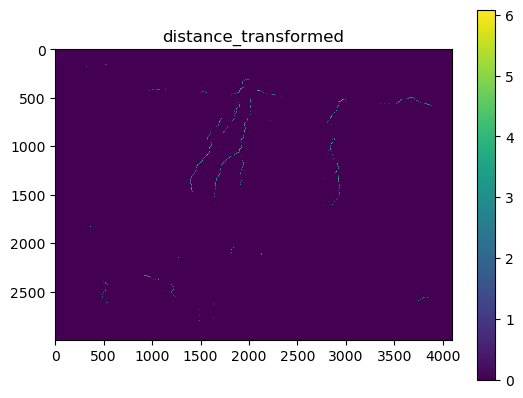

In [3]:
image_file = "/sandbox/Documents/zhongnan/fastlio-color/20240715/_2024-07-15-17-12-54_reconstruct/mask40/1721034783.631872.png"
# input_image = cv2.imread('/home/iix5sgh/workspace/crack/dataset/Final_Dataset/Infer/Rissbilder_for_Florian_9S6A2798_1187_2443_2573_2349.png', cv2.IMREAD_GRAYSCALE)
input_image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

_, binary_image = cv2.threshold(input_image, 0, 255, cv2.THRESH_BINARY)
distance_transformed = distance(binary_image)

plt.imshow(distance_transformed, cmap='viridis')
plt.colorbar()
# plt.imshow(distance_transformed, cmap='gray')
plt.title('distance_transformed')
plt.show()

In [ ]:
from plantcv import plantcv as pcv

# Set global debug behavior to None (default), "print" (to file), 
# or "plot" (Jupyter Notebooks or X11)
pcv.params.debug = "plot"

skeleton = pcv.morphology.skeletonize(mask=input_image)